# Quiz: Autocorrelation, stationarity, time series forecasting 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Task №1
**Ru**: Даны данные по ежемесячному уровню производства молока в фунтах на одну корову. Загрузите ряд и постройте график.

**En**: You are provided with a data for the monthly level of milk production in pounds per cow. Load the time series (data) and make a plot.

In [2]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [3]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<AxesSubplot:xlabel='month'>

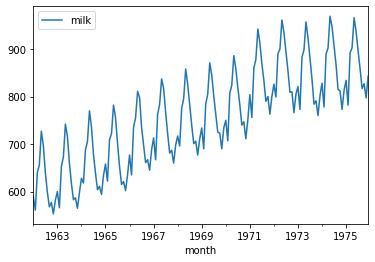

In [4]:
milk.plot()

## Task №2
**Ru**: Примените к ряду из предыдущего вопроса *критерий Дики-Фуллера*. Чему равен полученный достигаемый уровень значимости? 

**En**: Apply the *Dickey-Fuller criteria* to the time series from the previous question. What is the achieved attainable significance level? 

In [5]:
sm.tsa.stattools.adfuller(milk)

(-1.3038115874221219,
 0.6274267086030352,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

Attainable significance level is 0.63, which means that the series are not stationary.

## Task №3
**Ru**: Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.  
В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

**En**: Use the number of days in a month to calculate the new average daily milk yield per cow. Plot this series and make sure it become smoother.  
Enter the sum of the values of the received indicator for the entire period as the answer for the task. 

In [6]:
milk['days'] = [pd.Period(str(day)[:10]).days_in_month for day in milk.index]#pd.Period(milk['milk']).days_in_month

In [7]:
milk['daily'] = milk['milk']/milk['days']
milk.head()

,milk,days,daily
month,,,
1962-01-01,589,31,19.000000
1962-02-01,561,28,20.035714
1962-03-01,640,31,20.645161
1962-04-01,656,30,21.866667
1962-05-01,727,31,23.451613


In [8]:
milk['daily'].sum()

4166.326661899466

<AxesSubplot:xlabel='month'>

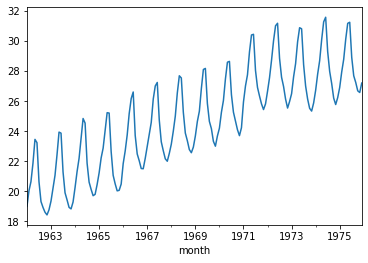

In [9]:
milk['daily'].plot()



---

## Task №4
**Ru**: Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерия Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным. 

**En**: Use the Dickey-Fuller criteria for the series with the average daily amount of milk per cow from the previous question to select the order of differentiation for the series to become stationary. 

In [10]:
milk['daily_diff1'] = milk['daily'] - milk['daily'].shift(1)

<AxesSubplot:xlabel='month'>

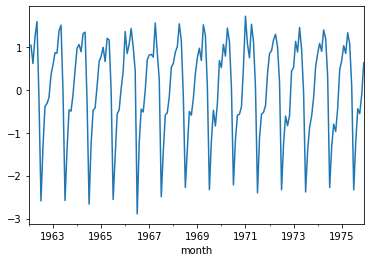

In [11]:
milk['daily_diff1'].plot()

Let's use various differentiation shifts to see how it affects the data


iter no 2 
Fuller (-2.7594694762289262, 0.0643005465417445, 11, 155, {'1%': -3.4732590518613002, '5%': -2.880374082105334, '10%': -2.5768120811654525}, -1.1539973381055688)

iter no 4 
Fuller (-2.7937982963242978, 0.05916511252379179, 9, 154, {'1%': -3.473542528196209, '5%': -2.880497674144038, '10%': -2.576878053634677}, -0.7967393228710193)

iter no 6 
Fuller (-3.666770636411523, 0.0046055892687224265, 12, 146, {'1%': -3.4759527332353084, '5%': -2.881548071241103, '10%': -2.577438765246763}, 80.12169731805625)

iter no 8 
Fuller (-3.3893348113259982, 0.011327864936595235, 14, 137, {'1%': -3.479007355368944, '5%': -2.8828782366015093, '10%': -2.5781488587564603}, 56.38632164384987)

iter no 10 
Fuller (-4.108678623334504, 0.0009370231442405691, 13, 129, {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}, 74.20891976175994)

iter no

<ipython-input-12-b28c5c111112>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milk[column_name] = milk['daily'] - milk['daily'].shift(i)


 12 
Fuller (-3.6426133475973685, 0.0049967073981015105, 12, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, 86.67725360956547)

iter no 14 
Fuller (-2.971936939454172, 0.03759955189177335, 13, 105, {'1%': -3.4942202045135513, '5%': -2.889485291005291, '10%': -2.5816762131519275}, 65.32223425312537)


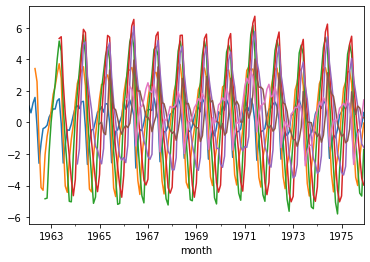

In [12]:
for i in range(1,15,2):
    column_name = 'daily_diff' + str(i)
    milk[column_name] = milk['daily'] - milk['daily'].shift(i)
    milk = milk.dropna()#(inplace=True)
    #sm.tsa.stattools.adfuller(milk[column_name])
    print("\niter no", i+1, "\nFuller",sm.tsa.stattools.adfuller(milk[column_name]))
    milk[column_name].plot()
    #plt.show()

Seems that little shifts are not really effective while larger ones make data smoother, but don't help to get rid or cycles.

In [13]:
milk.head()

,milk,days,daily,daily_diff1,daily_diff3,daily_diff5,daily_diff7,daily_diff9,daily_diff11,daily_diff13
month,,,,,,,,,,
1966-02-01,635,28,22.678571,0.839862,2.611905,2.178571,0.033410,-2.547235,-0.192396,1.452765
1966-03-01,736,31,23.741935,1.063364,3.258065,3.709677,2.677419,-1.458065,-0.324731,1.527650
1966-04-01,755,30,25.166667,1.424731,3.327957,5.100000,4.666667,2.521505,-0.059140,2.295699
1966-05-01,811,31,26.161290,0.994624,3.482719,5.677419,6.129032,5.096774,0.961290,2.094624
1966-06-01,798,30,26.600000,0.438710,2.858065,4.761290,6.533333,6.100000,3.954839,1.374194


Let's make seasonal differentiation as well as differentiation with a shift equals to one.

<AxesSubplot:xlabel='month'>

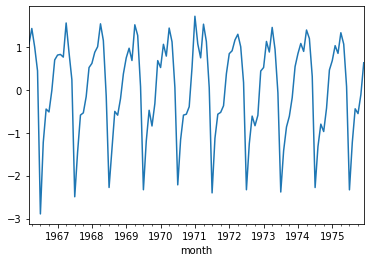

In [14]:
milk['task'] = milk['daily'] - milk['daily'].shift(1)
milk = milk.dropna()
sm.tsa.stattools.adfuller(milk['task'])
milk['task'].plot()

<AxesSubplot:xlabel='month'>

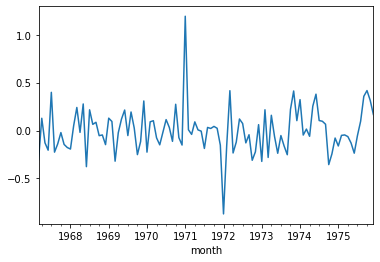

In [15]:
milk['task'] = milk['task'] - milk['task'].shift(12)
milk = milk.dropna()
sm.tsa.stattools.adfuller(milk['task'])
milk['task'].plot()

As a result we've got stationary time series without obvious trend and cycles.

## Task №5
**Ru**: Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. 
Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?

**En**: For the stationary series from the previous question (differentiated as many times as you consider needed) and plot the autocorrelation function.
Based on this graph, what initial approximation would you suggest for the Q parameter in the SARIMA model? 

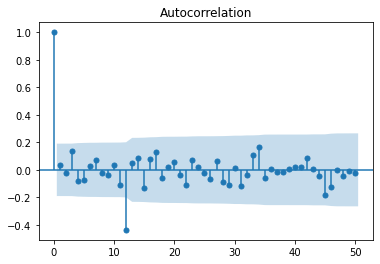

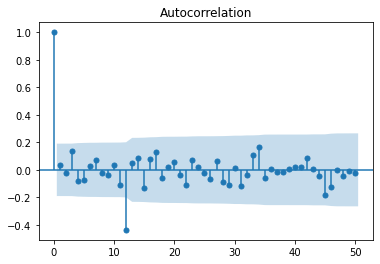

In [16]:
sm.graphics.tsa.plot_acf(milk['task'].values.squeeze(), lags=50)

Q = 1 since the last significant lag is twelve and seasonality is equal to twelve as well.

## Task №6
**Ru**: Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции.  
Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?

**En**: For the same series as in the previous question, plot the partial autocorrelation function.
Based on this graph, what initial guess would you suggest for the p parameter in the SARIMA model? 

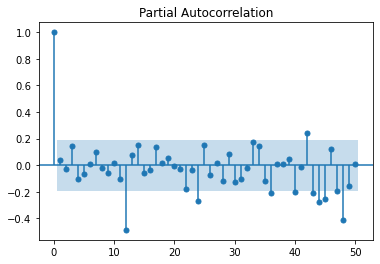

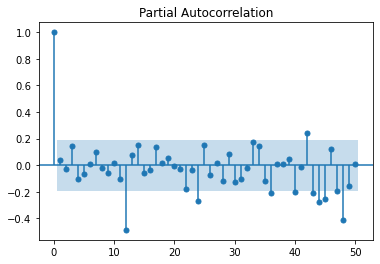

In [17]:
sm.graphics.tsa.plot_pacf(milk['task'].values.squeeze(), lags=50)

We do not have significant non-seasonal lags so p = 0.